# Introducción al Proyecto de DS

En este proyecto, analizaremos los sueldos desde el año 2020 hasta el 2023 de puestos de trabajos de data science, junto con sus aumentos anuales por puesto, como la predicción de sueldo promedio para el proximo año.

## Importación e información del proyecto.

### Carga de .csv

Importamos la libreria files a google colab y habilitamos la seleccion de archivo a abrir.


In [1]:
from google.colab import files
print("Cargue el archivo .csv:")
uploaded = files.upload()

Cargue el archivo .csv:


Saving ds_salaries.csv to ds_salaries.csv


Leemos desde panda el archivo, y segun el caso, nos avisara si pudo ser cargado, o se produjo alguna excepcion.

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('ds_salaries.csv')
    print("Su archivo fue cargado exitosamente.")
except FileNotFoundError:
    print("No se encontró el archivo.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except pd.errors.ParserError:
    print("Error al cargar el archivo.")

Su archivo fue cargado exitosamente.


### Información del archivo y chequeo de carga correcta

Vemos como esta estructurado el DataSet, nos figurarán 3755 Registros y
11 columnas.

In [ ]:
df.shape

(3755, 11)

Al ya cargarse, veremos las 10 primeras columnas.

In [ ]:
if 'df' in locals():
    print(df.iloc[:, :10])
else:
    print("No se pudo cargar el archivo.")

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

Observamos de que tipo es el valor de cada columna, y en caso de necesitar, lo modificaremos.

In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
glo_colu = df.columns.tolist()

print("Glosario de Columnas:")
for columna in glo_colu:
    print(f"- {columna}")

Glosario de Columnas:
- work_year
- experience_level
- employment_type
- job_title
- salary
- salary_currency
- salary_in_usd
- employee_residence
- remote_ratio
- company_location
- company_size


El DataSet posee 11 columnas, las cuales son:

**work_year:** Aqui se marca el año de trabajo, desde el 2020 al 2023.

**experience_level:** Aqui tenemos el nivel de experiencia, Senior, Junior, Ejecutivo.

**employment_type:** Aqui podemos observar el tipo de empleo, Parcial, Freelance, Tiempo Completo, Contrato.

**job_title:** Esta columna, se ocupa de los trabajos o puestos de trabajos, como por ejemplo Data Science, etc.

**salary_in_usd:** En esta columna, podemos observar el salario en dolares.

**employee_residence:** Esta columna explica el lugar de residencia del empleado.

**remote_ratio:** Aqui se detalla si es Hibrido, Remoto o Presencial.

**company_location:** Aqui podemos observar, el lugar de la compañia.

**company_size:** Aqui vemos el tamaño de la empresa.

**salary:** Se muestra el salario en la moneda del pais del empleado.

**salary_currency:** Se muestra en que moneda se pago el salary.

### Selección de información útil para nuestro caso de estudio

Vamos a eliminar las columnas que no utilizaremos por no ser necesarias, caso salary y salary_currency, ya que tomaremos directamente la columna salary_in_usd, ademas del tamaño de la compañia que no es necesario en este caso.

In [ ]:
columnas_eliminar = ['salary', 'salary_currency']
df = df.drop(columnas_eliminar, axis=1)

Le asignaremos tipo string a remote_ratio, para que no sea contabilizado al momento de hacer estadistica descriptiva de las columnas numéricas.

In [ ]:
df['remote_ratio'] = df['remote_ratio'].astype(str)

## Estadística Descriptiva y Análisis.

### General

Ahora obtenemos la info del DataFrame, aplicamos estadistica descriptiva, y generamos una matriz de correlación.

In [ ]:
if 'df' in locals():
    print("Información básica:")
    print(df.info())

    print("\nEstadísticas descriptivas de las columnas numéricas:")
    print(df.describe())

    print("\nMatriz de correlación:")
    print(df.corr())
else:
    print("No se pudo cargar el archivo.")

Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   object
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(2), object(7)
memory usage: 264.1+ KB
None

Estadísticas descriptivas de las columnas numéricas:
         work_year  salary_in_usd
count  3755.000000    3755.000000
mean   2022.373635  137570.389880
std       0.691448   63055.625278
min    2020.000000    5132.000000
25%    2022.000000   95000.000000
50%    2022.000000  135000.0000

<ipython-input-11-20bfe7e740a1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


1. **work_year:**
   - Count: 3755. Es el número total de observaciones en la columna "work_year".
   - Mean: 2022.37. Es el promedio de los valores en la columna "work_year". Indica que la mayoría de las observaciones se encuentran alrededor del año 2022.
   - Std (Desviación estándar): 0.69. Representa la dispersión o variabilidad de los valores en la columna "work_year" respecto a la media. En este caso, los valores están muy próximos a la media, lo que indica que la distribución es bastante ajustada.
   - Min: 2020. Es el valor más bajo en la columna "work_year".
   - 25%: 2022. Es el percentil 25 de la columna "work_year". El 25% de los datos tiene un valor igual o menor que 2022.
   - 50%: 2022. Es el percentil 50 o la mediana de la columna "work_year". Representa el valor que se encuentra justo en el medio de la distribución.
   - 75%: 2023. Es el percentil 75 de la columna "work_year". El 75% de los datos tiene un valor igual o menor que 2023.
   - Max: 2023. Es el valor más alto en la columna "work_year". Indica el año más reciente presente en los datos.

2. **salary_in_usd:**
   - Count: 3755. Es el número total de observaciones en la columna "salary_in_usd".
   - Mean: 137,570.39 USD. Representa el salario promedio en dólares estadounidenses.
   - Std (Desviación estándar): 63,055.63 USD. Indica la dispersión o variabilidad de los salarios en la columna "salary_in_usd". Cuanto mayor sea la desviación estándar, mayor será la variabilidad de los salarios con respecto a la media.
   - Min: 5,132.00 USD. Es el salario mínimo registrado en la columna "salary_in_usd".
   - 25%: 95,000.00 USD. Es el percentil 25 de la columna "salary_in_usd". El 25% de los salarios tiene un valor igual o inferior a 95,000.00 USD.
   - 50%: 135,000.00 USD. Es el percentil 50 o la mediana de la columna "salary_in_usd". Representa el valor que divide a la distribución en dos partes iguales.
   - 75%: 175,000.00 USD. Es el percentil 75 de la columna "salary_in_usd". El 75% de los salarios tiene un valor igual o inferior a 175,000.00 USD.
   - Max: 450,000.00 USD. Es el salario máximo registrado en la columna "salary_in_usd".

Las estadísticas descriptivas nos dan una idea general sobre las columnas numéricas "work_year" y "salary_in_usd" en los datos. En cuanto a los años de trabajo, parece que la mayoría de los datos son de 2022 y 2023. Esto puede ser porque se agregaron trabajos nuevos o se recopilaron datos a partir de 2022 para trabajos que antes no teníamos información.

Hablando de salarios en dólares, el promedio es de unos 137,570, pero hay una gran variación con una desviación estándar de 63,055. Esto significa que algunos salarios son bastante diferentes del promedio. El salario más bajo en los datos es de 5,132, mientras que el máximo llega a 450,000, dandonos a entender que la diferencia entre la gama de salarios es alta.

### Por tipo de empleo

Analizaremos por tipo de empleo, y la diferencia salarial entre categorias de esta columna.


In [ ]:
grouped_data = df.groupby('employment_type')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría '{group_name}':")
    print(group_df.describe())


Análisis descriptivo para la categoría 'CT':
         work_year  salary_in_usd
count    10.000000      10.000000
mean   2021.700000  113446.900000
std       0.948683  130176.746842
min    2020.000000    7500.000000
25%    2021.000000   30117.250000
50%    2022.000000   75000.000000
75%    2022.000000  103750.000000
max    2023.000000  416000.000000

Análisis descriptivo para la categoría 'FL':
         work_year  salary_in_usd
count    10.000000      10.000000
mean   2021.700000   51807.800000
std       0.948683   29458.879336
min    2020.000000   12000.000000
25%    2021.000000   34281.000000
50%    2022.000000   50000.000000
75%    2022.000000   57500.000000
max    2023.000000  100000.000000

Análisis descriptivo para la categoría 'FT':
         work_year  salary_in_usd
count  3718.000000    3718.000000
mean   2022.381657  138314.199570
std       0.684866   62452.177613
min    2020.000000    5132.000000
25%    2022.000000   95599.000000
50%    2022.000000  135000.000000
75%    2023.

**INFORME DE DATOS**

**Categoría 'CT':**
En la categoría Contrato de trabajo, podemos observar que 10 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 113,446.9, y los salarios mínimos y máximos registrados son 7,500 y 416,000.

σ: 130,176.75
P25: 30,117.25
P50: 75,000.0
P75: 103,750.0

**Categoría 'FL':**
En la categoría Freelance, podemos observar que 10 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 51,807.8, y los salarios mínimos y máximos registrados son 12,000 y 100,000.

σ: 29,458.88
P25: 34,281.0
P50: 50,000.0
P75: 57,500.0

**Categoría 'FT':**
En la categoría Full-Time, podemos observar que 3718 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 138,314.2, y los salarios mínimos y máximos registrados son 5,132 y 450,000.

σ: 62,452.18
P25: 95,599.0
P50: 135,000.0
P75: 175,075.0

**Categoría 'PT':**
En la categoría Part-Time, podemos observar que 17 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 39,533.71, y los salarios mínimos y máximos registrados son 5,409 y 125,404.

σ: 38,312.15
P25: 12,000.0
P50: 21,669.0
P75: 52,533.0

**ANALISIS DE DATOS**

Podemos observar que la mayoria de los contratados (99.015%), se encuentran en la categoria Full-Time, donde podemos hallar los salarios más altos comparados con otras categorías, consecuentemente a esto, podemos observar que la CT (0.2662%), sus sueldos tienen una brecha importante, llegando a tener una desviacion estandar de 130,176, y a su vez, un promedio de salario alto 113,446.9; tanto la FL (0.2662%) y la PT (0.453%), contienen salarios menores comparados con las otras, inclusive sus salarios promedios es menor al 50% del promedio de las otras dos categorías.

### Por nivel de experiencia

Observaremos los salarios por nivel de experiencia, y su diferencia entre categorias mas altas, a mas bajas.

In [ ]:
grouped_data = df.groupby('experience_level')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría '{group_name}':")
    print(group_df.describe())


Análisis descriptivo para la categoría 'EN':
         work_year  salary_in_usd
count   320.000000     320.000000
mean   2022.053125   78546.284375
std       0.909885   52225.424309
min    2020.000000    5409.000000
25%    2022.000000   40000.000000
50%    2022.000000   70000.000000
75%    2023.000000  110009.250000
max    2023.000000  300000.000000

Análisis descriptivo para la categoría 'EX':
         work_year  salary_in_usd
count   114.000000     114.000000
mean   2022.385965  194930.929825
std       0.758536   70661.929661
min    2020.000000   15000.000000
25%    2022.000000  145000.000000
50%    2023.000000  196000.000000
75%    2023.000000  239000.000000
max    2023.000000  416000.000000

Análisis descriptivo para la categoría 'MI':
         work_year  salary_in_usd
count   805.000000     805.000000
mean   2022.203727  104525.939130
std       0.793779   54387.685128
min    2020.000000    5132.000000
25%    2022.000000   66837.000000
50%    2022.000000  100000.000000
75%    2023.

**INFORME DE DATOS**

**Categoría 'EN':**
En la categoría Empleado Normal, podemos observar que 320 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 78,546.28, y los salarios mínimos y máximos registrados son 5,409 y 300,000.

σ: 52,225.42
P25: 40,000.0
P50: 70,000.0
P75: 110,009.25

**Categoría 'EX':**
En la categoría Ejecutivo, podemos observar que 114 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 194,930.93, y los salarios mínimos y máximos registrados son 15,000 y 416,000.

σ: 70,661.93
P25: 145,000.0
P50: 196,000.0
P75: 239,000.0

**Categoría 'MI':**
En la categoría Medio, podemos observar que 805 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 104,525.94, y los salarios mínimos y máximos registrados son 5,132 y 450,000.

σ: 54,387.69
P25: 66,837.0
P50: 100,000.0
P75: 135,000.0

**Categoría 'SE':**
En la categoría Senior, podemos observar que 2,516 casos de la muestra forman parte de esta categoría, donde el salario promedio es de 153,051.07, y los salarios mínimos y máximos registrados son 8,000 y 423,834.

σ: 56,896.26
P25: 115,000.0
P50: 146,000.0
P75: 185,900.0

**ANALISIS DE DATOS**

Podemos observar que la mayoria de los contratados (67.02%), se encuentran en la categoria Senior, donde su sueldo promedio es el 2do más alto, detrás del sueldo promedio de los Ejecutivos (3.04%), que curiosamente, no posee el sueldo mas alto de toda la tabla, sino que este se encuentra en la categoria Medio (21.45%), donde podemos observar un sueldo máximo de 450,000, pero a su vez, es el segundo con salario promedio más bajo luego de Empleado normal (8.53%); además podemos observar que la desviación se da mas alta en Ejecutivo, debido a que tienen una mayor dispersion comparado con las otras categorias, es probable, por los roles y responsabilidades, además de la experiencia, la brecha de sueldos es más amplia.

### Por año de trabajo y puesto

Convertiremos work_year a string, para que no sea tomado a la hora de hacer el analisis descriptivo, ya que agruparemos por work_year y job_title a la vez.



In [ ]:
df['work_year'] = df['work_year'].astype(str)

Agruparemos por categorias tanto año de trabajo, como puesto. De esta forma, podremos evaluar bien los salarios de cada puesto, en cada año, y su aumento, primero los vemos de forma general.

In [ ]:
grouped_data = df.groupby(['work_year', 'job_title'])
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría '{group_name}':")
    print(group_df.describe())


Análisis descriptivo para la categoría '('2020', 'AI Scientist')':
       salary_in_usd
count            1.0
mean         45896.0
std              NaN
min          45896.0
25%          45896.0
50%          45896.0
75%          45896.0
max          45896.0

Análisis descriptivo para la categoría '('2020', 'BI Data Analyst')':
       salary_in_usd
count            1.0
mean         98000.0
std              NaN
min          98000.0
25%          98000.0
50%          98000.0
75%          98000.0
max          98000.0

Análisis descriptivo para la categoría '('2020', 'Big Data Engineer')':
       salary_in_usd
count       3.000000
mean    97690.333333
std     24111.689122
min     70000.000000
25%     89512.000000
50%    109024.000000
75%    111535.500000
max    114047.000000

Análisis descriptivo para la categoría '('2020', 'Business Data Analyst')':
       salary_in_usd
count       3.000000
mean   110000.000000
std     21794.494718
min     95000.000000
25%     97500.000000
50%    100000.0000

Si bien obtuvimos datos, para organizarlos de una forma mejor, los separaremos por puesto de trabajo:

**DATA**

In [ ]:
job_title_keyword = 'Data'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Data' en el año 2020:
count        64.000000
mean      84222.437500
std       69259.607022
min        5707.000000
25%       41387.000000
50%       73065.000000
75%      109268.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Data' en el año 2021:
count       172.000000
mean      98573.331395
std       63769.028182
min        5679.000000
25%       53868.500000
50%       88974.000000
75%      140461.500000
max      416000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Data' en el año 2022:
count      1353.000000
mean     131531.476718
std       57446.940063
min        5723.000000
25%       94560.000000
50%      130000.000000
75%      167000.000000
max      430967.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Data' 

**Categoria DATA:**

En el año 2020:
- Número de datos: 64
- Salario promedio: 84,222.44 USD
- Desviación estándar: 69,259.61 USD
- Salario mínimo: 5,707.00 USD
- Salario máximo: 412,000.00 USD

En el año 2021:
- Número de datos: 172
- Salario promedio: 98,573.33 USD
- Desviación estándar: 63,769.03 USD
- Salario mínimo: 5,679.00 USD
- Salario máximo: 416,000.00 USD

En el año 2022:
- Número de datos: 1353
- Salario promedio: 131,531.48 USD
- Desviación estándar: 57,446.94 USD
- Salario mínimo: 5,723.00 USD
- Salario máximo: 430,967.00 USD

En el año 2023:
- Número de datos: 1360
- Salario promedio: 143,409.72 USD
- Desviación estándar: 59,672.94 USD
- Salario mínimo: 9,727.00 USD
- Salario máximo: 385,000.00 USD

| Año   | Salario promedio (USD) |
|-------|------------------------|
| 2020  | 84222.44               |
| 2021  | 98573.33               |
| 2022  | 131531.48              |
| 2023  | 143409.72              |

El análisis muestra un crecimiento positivo en los salarios para trabajos 'Data' a lo largo de los cuatro años, lo que indica una tendencia al alza en el campo de la ciencia de datos y análisis de datos. Podriamos tener en cuenta además, el covid, donde se volvieron remotos muchos trabajos, y todo lo que tiene que ver con la ciencia de datos, se vio influido positivamente, como observamos la cantidad de casos que fueron contabilizados en 2022 y 2023. Podemos observar, que el salario minimo aumento en 2023, pero el maximo disminuyo, comparado con los otros 3 años donde se mantuvo casi por la misma media, sin embargo el salario promedio aumento, lo que quiere decir que, se paga mejor a mas cantidad de gente, y no hay tanta variabilidad en la distribución.

**AI**

In [ ]:
job_title_keyword = 'AI'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'AI' en el año 2020:
count        1.0
mean     45896.0
std          NaN
min      45896.0
25%      45896.0
50%      45896.0
75%      45896.0
max      45896.0
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'AI' en el año 2021:
count        5.00000
mean     25410.60000
std      18099.84701
min      12000.00000
25%      12000.00000
50%      18053.00000
75%      30000.00000
max      55000.00000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'AI' en el año 2022:
count        12.000000
mean     145652.000000
std       98261.797611
min        6304.000000
25%       47500.000000
50%      162500.000000
75%      200000.000000
max      300000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'AI' en el año 2023:
count        11.000000
mean     132226.181818
std      1

**Categoria AI**

En el año 2020:
- Número de datos: 1
- Salario promedio: 45,896.00 USD
- Desviación estándar: NaN (indicando que solo hay un dato y no se puede calcular la desviación estándar)
- Salario mínimo: 45,896.00 USD
- Salario máximo: 45,896.00 USD

En el año 2021:
- Número de datos: 5
- Salario promedio: 25,410.60 USD
- Desviación estándar: 18,099.85 USD
- Salario mínimo: 12,000.00 USD
- Salario máximo: 55,000.00 USD

En el año 2022:
- Número de datos: 12
- Salario promedio: 145,652.00 USD
- Desviación estándar: 98,261.80 USD
- Salario mínimo: 6,304.00 USD
- Salario máximo: 300,000.00 USD

En el año 2023:
- Número de datos: 11
- Salario promedio: 132,226.18 USD
- Desviación estándar: 112,073.43 USD
- Salario mínimo: 38,631.00 USD
- Salario máximo: 423,834.00 USD

| Año  | Salario promedio (USD) |
|------|-----------------------|
| 2020 | 45,896.00             |
| 2021 | 25,410.60             |
| 2022 | 145,652.00            |
| 2023 | 132,226.18            |

Podemos observar que los datos de 2020, solo contienen un dato, y luego va creciendo, AI es una categoria que esta en crecimiento reciente, como podemos observar, en 2022 y 2023, se dio un incremento importante tanto del salario promedio, de los datos, y del salario maximo, para en 2023, ya centrarse en un crecimiento del salario minimo. Concluimos finalmente, en que esta categoria, es una categoria que en el futuro sera mucho más requerida y crecera más, debido a la mayor adopcion de Inteligencia Artificial en las empresas, o establecimientos.

**COMPUTER VISION**

In [ ]:
job_title_keyword = 'COMPUTER VISION'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'COMPUTER VISION' en el año 2020:
count        1.0
mean     60000.0
std          NaN
min      60000.0
25%      60000.0
50%      60000.0
75%      60000.0
max      60000.0
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'COMPUTER VISION' en el año 2021:
count        8.000000
mean     35218.000000
std      30914.218791
min       5409.000000
25%      19031.500000
50%      22000.000000
75%      38956.750000
max      95746.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'COMPUTER VISION' en el año 2022:
count         7.000000
mean      59962.000000
std       56820.502564
min       10000.000000
25%       12948.500000
50%       50000.000000
75%       91918.500000
max      150000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'COMPUTER VISION' en el año 20

**MACHINE LEARNING**

In [ ]:
job_title_keyword = 'MACHINE LEARNING|ML'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'MACHINE LEARNING|ML' en el año 2020:
count         8.000000
mean     128358.500000
std       91342.415525
min       15966.000000
25%       49039.500000
50%      127552.000000
75%      175000.000000
max      260000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'MACHINE LEARNING|ML' en el año 2021:
count        33.000000
mean     102898.424242
std       95350.849225
min       12000.000000
25%       24823.000000
50%       77364.000000
75%      125000.000000
max      423000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'MACHINE LEARNING|ML' en el año 2022:
count       174.000000
mean     143426.896552
std       60647.053436
min       10000.000000
25%      100000.000000
50%      142200.000000
75%      189937.500000
max      375000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para l

**Categoría MACHINE LEARNING | ML**

En el año 2020:

- Número de datos: 8
- Salario promedio: 128,358.50 USD
- Desviación estándar: 91,342.42 USD
- Salario mínimo: 15,966.00 USD
- Salario máximo: 260,000.00 USD

En el año 2021:

- Número de datos: 33
- Salario promedio: 102,898.42 USD
- Desviación estándar: 95,350.85 USD
- Salario mínimo: 12,000.00 USD
- Salario máximo: 423,000.00 USD

En el año 2022:

- Número de datos: 174
- Salario promedio: 143,426.90 USD
- Desviación estándar: 60,647.05 USD
- Salario mínimo: 10,000.00 USD
- Salario máximo: 375,000.00 USD

En el año 2023:

- Número de datos: 198
- Salario promedio: 165,613.04 USD
- Desviación estándar: 63,469.40 USD
- Salario mínimo: 25,500.00 USD
- Salario máximo: 342,300.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2020 | 128,358.50
2021 | 102,898.42
2022 | 143,426.90
2023 | 165,613.04

En la categoría 'MACHINE LEARNING', se observa un aumento en el número de datos disponibles a lo largo de los años, lo que indica un crecimiento en la demanda de trabajos relacionados con machine learning.

Podemos observar un aumento del salario promedio de 2021 hasta 2023, con salarios importantes en 2020 por la pandemia de Covid, y la necesidad de trabajos remotos, luego se fue acomodando en valores, se espera que la tendencia creciente se replique en el futuro.

**RESEARCH**

In [ ]:
job_title_keyword = 'RESEARCH'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'RESEARCH' en el año 2020:
count         2.000000
mean     246000.000000
std      288499.566724
min       42000.000000
25%      144000.000000
50%      246000.000000
75%      348000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'RESEARCH' en el año 2021:
count        14.000000
mean      63401.142857
std       46568.139997
min        5409.000000
25%       27500.000000
50%       61703.000000
75%       79395.750000
max      187442.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'RESEARCH' en el año 2022:
count        28.000000
mean     138700.321429
std       73120.626550
min       10000.000000
25%       87992.750000
50%      137000.000000
75%      161500.000000
max      300000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que cont

**Categoría RESEARCH**

En el año 2020:

- Número de datos: 2
- Salario promedio: 246,000.00 USD
- Desviación estándar: 288,499.57 USD
- Salario mínimo: 42,000.00 USD
- Salario máximo: 450,000.00 USD

En el año 2021:

- Número de datos: 14
- Salario promedio: 63,401.14 USD
- Desviación estándar: 46,568.14 USD
- Salario mínimo: 5,409.00 USD
- Salario máximo: 187,442.00 USD

En el año 2022:

- Número de datos: 28
- Salario promedio: 138,700.32 USD
- Desviación estándar: 73,120.63 USD
- Salario mínimo: 10,000.00 USD
- Salario máximo: 300,000.00 USD

En el año 2023:

- Número de datos: 90
- Salario promedio: 166,740.84 USD
- Desviación estándar: 58,743.04 USD
- Salario mínimo: 50,000.00 USD
- Salario máximo: 370,000.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2020 | 246,000.00
2021 | 63,401.14
2022 | 138,700.32
2023 | 166,740.84

Podemos Observar que al haber primero 2 datos, el pago era mayor, ya que no habia tanta oferta, para la demanda, especialmente en tiempos de Covid, y trabajos remotos. Luego fueron aumentando los numeros de datos, disminuyendo no solo el promedio, sino tambien el minimo y el maximo, para luego del 2021 en adelante, ir en crecimiento, demostrando una vez mas, que las empresas, estan mejorando tecnologicamente.

**ANALYTICS ENGINEER**

In [ ]:
job_title_keyword = 'Analytics Engineer'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Analytics Engineer' en el año 2021:
count         3.000000
mean      79732.333333
std       30003.582058
min       50000.000000
25%       64598.500000
50%       79197.000000
75%       94598.500000
max      110000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Analytics Engineer' en el año 2022:
count        60.000000
mean     133871.316667
std       57897.250349
min        7500.000000
25%      101997.250000
50%      132500.000000
75%      171250.000000
max      250000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Analytics Engineer' en el año 2023:
count        46.000000
mean     170210.652174
std       47130.075861
min       87000.000000
25%      140800.000000
50%      166000.000000
75%      195250.000000
max      289800.000000
Name: salary_in_usd, dtype: float64


**Categoria Analytics Engineer:**
En el año 2021:
- Número de datos: 3
- Salario promedio: 79,732.33 USD
- Desviación estándar: 30,003.58 USD
- Salario mínimo: 50,000.00 USD
- Salario máximo: 110,000.00 USD

En el año 2022:
- Número de datos: 60
- Salario promedio: 133,871.32 USD
- Desviación estándar: 57,897.25 USD
- Salario mínimo: 7,500.00 USD
- Salario máximo: 250,000.00 USD

En el año 2023:
- Número de datos: 46
- Salario promedio: 170,210.65 USD
- Desviación estándar: 47,130.08 USD
- Salario mínimo: 87,000.00 USD
- Salario máximo: 289,800.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2021 | 79,732.33
2022 | 133,871.32
2023 | 170,210.65

Observamos que no poseemos datos en el año 2020, pero luego si encontramos un aumento importante a partir del año 2022, donde no solo aumentaron todos los salarios, sino que ademas disminuyo el desvio estandar, lo que quiere decir, que no hubo tanta variabilidad en los salarios. Pudiendo denotar, no solo crecimiento en el salario, sino tambien en la demanda.

**APPLIED SCIENTIST**

In [ ]:
job_title_keyword = 'Applied Scientist'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Applied Scientist' en el año 2022:
count        18.000000
mean     188311.111111
std       26704.636112
min      141525.000000
25%      184000.000000
50%      191737.500000
75%      205000.000000
max      230000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Applied Scientist' en el año 2023:
count        40.000000
mean     191143.500000
std       60322.307289
min       72000.000000
25%      136000.000000
50%      190000.000000
75%      222200.000000
max      350000.000000
Name: salary_in_usd, dtype: float64


**Categoría Applied Scientist:**

En el año 2022:
- Número de datos: 18
- Salario promedio: 188,311.11 USD
- Desviación estándar: 26,704.64 USD
- Salario mínimo: 141,525.00 USD
- Salario máximo: 230,000.00 USD

En el año 2023:
- Número de datos: 40
- Salario promedio: 191,143.50 USD
- Desviación estándar: 60,322.31 USD
- Salario mínimo: 72,000.00 USD
- Salario máximo: 350,000.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2022 | 188,311.11
2023 | 191,143.50

Para la categoría de 'Applied Scientist', se puede observar que hay datos disponibles únicamente para los años 2022 y 2023.
Ha habido un incremento importante en la demanda, como asi en los salarios maximos y promedios, aunque etambien, se genero una mayor variabilidad entre ellos, debido a una desviacion estandar de aproximadamente el doble a 2022, ya que el salario minimo tambien disminuyo en los datos asignados.

**ETL**

In [ ]:
job_title_keyword = 'ETL'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'ETL' en el año 2022:
count        10.000000
mean     131453.600000
std       87523.593993
min       52533.000000
25%       63000.000000
50%       93635.000000
75%      224050.000000
max      250000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'ETL' en el año 2023:
count        2.000000
mean     71394.500000
std      19334.420718
min      57723.000000
25%      64558.750000
50%      71394.500000
75%      78230.250000
max      85066.000000
Name: salary_in_usd, dtype: float64


**Categoría ETL:**

En el año 2022:
- Número de datos: 10
- Salario promedio: 131,453.60 USD
- Desviación estándar: 87,523.59 USD
- Salario mínimo: 52,533.00 USD
- Salario máximo: 250,000.00 USD

En el año 2023:
- Número de datos: 2
- Salario promedio: 71,394.50 USD
- Desviación estándar: 19,334.42 USD
- Salario mínimo: 57,723.00 USD
- Salario máximo: 85,066.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2022 | 131,453.60
2023 | 71,394.50

Para la categoría de 'ETL', se observa una cantidad limitada de datos disponibles en los años 2022 y 2023.
Estos resultados sugieren que la categoría de 'ETL' puede tener una demanda fluctuante y una cantidad limitada de oportunidades laborales en comparación con otras categorías. La reducción en la cantidad de datos y el salario promedio en el año 2023 podrían indicar una menor demanda en el mercado para esta especialidad específica en comparación con otros roles relacionados con ciencia de datos y análisis.

**INSIGHT ANALYST**

In [ ]:
job_title_keyword = 'Insight Analyst'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Insight Analyst' en el año 2023:
count        2.000000
mean     46786.000000
std       6014.650281
min      42533.000000
25%      44659.500000
50%      46786.000000
75%      48912.500000
max      51039.000000
Name: salary_in_usd, dtype: float64


**Categoría Insight Analyst:**

En el año 2023:
- Número de datos: 2
- Salario promedio: 46,786.00 USD
- Desviación estándar: 6,014.65 USD
- Salario mínimo: 42,533.00 USD
- Salario máximo: 51,039.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2023 | 46,786.00

Para la categoría de 'Insight Analyst', se observa una cantidad muy limitada de datos disponibles en el año 2023, con solo 2 registros. No es posible sacar conclusiones con tan poca historia y datos, por lo tanto, podriamos asignarla como un puesto nuevo, o no muy demandado.

**DEEP LEARNING**

In [ ]:
job_title_keyword = 'Deep Learning Engineer'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Deep Learning Engineer' en el año 2022:
count        2.000000
mean     67723.000000
std      26120.524497
min      49253.000000
25%      58488.000000
50%      67723.000000
75%      76958.000000
max      86193.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Deep Learning Engineer' en el año 2023:
count         4.000000
mean     130000.000000
std       24494.897428
min      100000.000000
25%      115000.000000
50%      135000.000000
75%      150000.000000
max      150000.000000
Name: salary_in_usd, dtype: float64


**Categoría Deep Learning Engineer:**

En el año 2022:
- Número de datos: 2
- Salario promedio: 67,723.00 USD
- Desviación estándar: 26,120.52 USD
- Salario mínimo: 49,253.00 USD
- Salario máximo: 86,193.00 USD

En el año 2023:
- Número de datos: 4
- Salario promedio: 130,000.00 USD
- Desviación estándar: 24,494.90 USD
- Salario mínimo: 100,000.00 USD
- Salario máximo: 150,000.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2022 | 67,723.00
2023 | 130,000.00

Observamos un número limitado de datos, esto no nos permite desarrollar un criterio amplio, y deberiamos tener en cuenta, como con los otros que no poseen un gran banco de datos, de que posiblemente no representen el espacio laboral de manera perfecta, dicho esto, podemos observar un incremento en los puestos adquiridos, ademas de un aumento importante en todos los salarios, muestra de esto se da en la desviacion estandar de 2023, que es menor a la de 2022.

**AUTONOMOUS VEHICLE TECHNICIAN**

In [ ]:
job_title_keyword = 'Autonomous Vehicle Technician'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Autonomous Vehicle Technician' en el año 2021:
count        1.0
mean     45555.0
std          NaN
min      45555.0
25%      45555.0
50%      45555.0
75%      45555.0
max      45555.0
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Autonomous Vehicle Technician' en el año 2023:
count       1.0
mean     7000.0
std         NaN
min      7000.0
25%      7000.0
50%      7000.0
75%      7000.0
max      7000.0
Name: salary_in_usd, dtype: float64


**Categoría Autonomous Vehicle Technician:**

En el año 2021:
- Número de datos: 1
- Salario promedio: 45,555.00 USD
- Desviación estándar: NaN (indicando que solo hay un dato y no se puede calcular la desviación estándar)
- Salario mínimo: 45,555.00 USD
- Salario máximo: 45,555.00 USD

En el año 2023:
- Número de datos: 1
- Salario promedio: 7,000.00 USD
- Desviación estándar: NaN (indicando que solo hay un dato y no se puede calcular la desviación estándar)
- Salario mínimo: 7,000.00 USD
- Salario máximo: 7,000.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2021 | 45,555.00
2023 | 7,000.00

Si vienen se basa en 2 años, estos estan separados, y solo poseemos 2 datos, esta variable no es significativa, solo podemos observar una disminucion en el salario, y el mantenimiento de demanda.

**BUSINESS INTELLIGENCE ENGINEER**

In [ ]:
job_title_keyword = 'Business Intelligence Engineer|BI'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)


Análisis descriptivo para la categoría de job_title que contiene 'Business Intelligence Engineer|BI' en el año 2020:
count         4.000000
mean      97767.750000
std       19687.720579
min       70000.000000
25%       91000.000000
50%      103512.000000
75%      110279.750000
max      114047.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Business Intelligence Engineer|BI' en el año 2021:
count        12.000000
mean      48197.000000
std       46469.368284
min        5409.000000
25%       14489.000000
50%       29435.000000
75%       69925.750000
max      150000.000000
Name: salary_in_usd, dtype: float64

Análisis descriptivo para la categoría de job_title que contiene 'Business Intelligence Engineer|BI' en el año 2022:
count        17.000000
mean      79499.117647
std       55516.791298
min        6270.000000
25%       48000.000000
50%       60938.000000
75%      120000.000000
max      200000.000000
Name: salary_in_usd, d

**Categoría Business Intelligence Engineer|BI:**

En el año 2020:
- Número de datos: 4
- Salario promedio: 97,767.75 USD
- Desviación estándar: 19,687.72 USD
- Salario mínimo: 70,000.00 USD
- Salario máximo: 114,047.00 USD

En el año 2021:
- Número de datos: 12
- Salario promedio: 48,197.00 USD
- Desviación estándar: 46,469.37 USD
- Salario mínimo: 5,409.00 USD
- Salario máximo: 150,000.00 USD

En el año 2022:
- Número de datos: 17
- Salario promedio: 79,499.12 USD
- Desviación estándar: 55,516.79 USD
- Salario mínimo: 6,270.00 USD
- Salario máximo: 200,000.00 USD

En el año 2023:
- Número de datos: 23
- Salario promedio: 129,856.00 USD
- Desviación estándar: 41,789.04 USD
- Salario mínimo: 48,289.00 USD
- Salario máximo: 225,000.00 USD

**Informe de cambios y tendencias:**

La categoría de Business Intelligence Engineer|BI muestra una evolución en la cantidad de datos disponibles a lo largo de los años, lo que sugiere un mayor interés y demanda de profesionales en esta especialización. Podemos observar ademas, un incremento en los salarios, como asi en la variabilidad de los mismos. Para cerrar el analisis, se espera que esta tendencia de crecimiento continue a futuro, ya que la demanda de profesionales en BUsiness Intelligence, es vital en al toma de decisiones, y tiene una tendencia en alta en la industria actual.

**NLP**

In [ ]:
job_title_keyword = 'NLP'
filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
grouped_data = filtered_data.groupby('work_year')
for group_name, group_df in grouped_data:
    print(f"\nAnálisis descriptivo para la categoría de job_title que contiene '{job_title_keyword}' en el año {group_name}:")
    descriptive_stats = group_df['salary_in_usd'].describe()
    print(descriptive_stats)

**Categoría NLP (Natural Language Processing):**

En el año 2022:
- Número de datos: 3
- Salario promedio: 36,499.00 USD
- Desviación estándar: 28,267.12 USD
- Salario mínimo: 5,132.00 USD
- Salario máximo: 60,000.00 USD

En el año 2023:
- Número de datos: 4
- Salario promedio: 205,000.00 USD
- Desviación estándar: 62,182.53 USD
- Salario mínimo: 135,000.00 USD
- Salario máximo: 275,000.00 USD

Año | Salario promedio (USD)
--- | -----------------------
2022 | 36,499.00
2023 | 205,000.00

Podemos observar un crecimiento de salarios, manteniendo la demanda en casi los mismos niveles, lo que nos da la pauta, de que tomo mayor relevancia este puesto, y es posible que a futuro veamos mayor demanda, y mejores salarios, mas alla de que es una muestra pequeña.

## **Gráficos y análisis**

Importamos la libreria Matplot, para poder generar los gráficos que luego analizaremos.

In [ ]:
import matplotlib.pyplot as plt

### **2020**

**Barras**

No hay datos disponibles para 'NLP' en el año 2020.
No hay datos disponibles para 'Autonomous Vehicle Technician' en el año 2020.
No hay datos disponibles para 'Deep Learning Engineer' en el año 2020.
No hay datos disponibles para 'Insight Analyst' en el año 2020.
No hay datos disponibles para 'ETL' en el año 2020.
No hay datos disponibles para 'Applied Scientist' en el año 2020.
No hay datos disponibles para 'Analytics Engineer' en el año 2020.


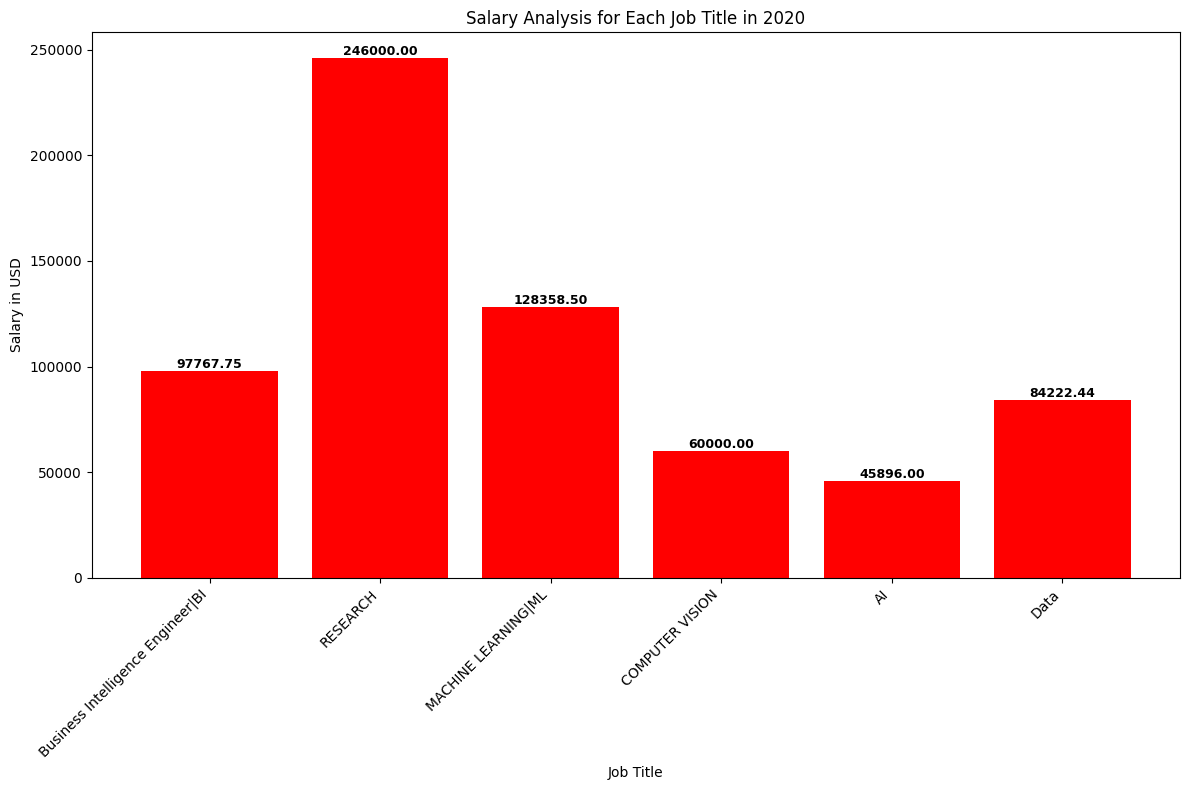

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
plt.figure(figsize=(12, 8))
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2020 = filtered_data[filtered_data['work_year'] == '2020']
    if not filtered_data_2020.empty:
        descriptive_stats_2020 = filtered_data_2020['salary_in_usd'].describe()
        plt.bar(job_title_keyword, descriptive_stats_2020['mean'], color='red', label='Mean')
        plt.text(job_title_keyword, descriptive_stats_2020['mean'], f'{descriptive_stats_2020["mean"]:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        print(f"No hay datos disponibles para '{job_title_keyword}' en el año 2020.")
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**BoxPlot**

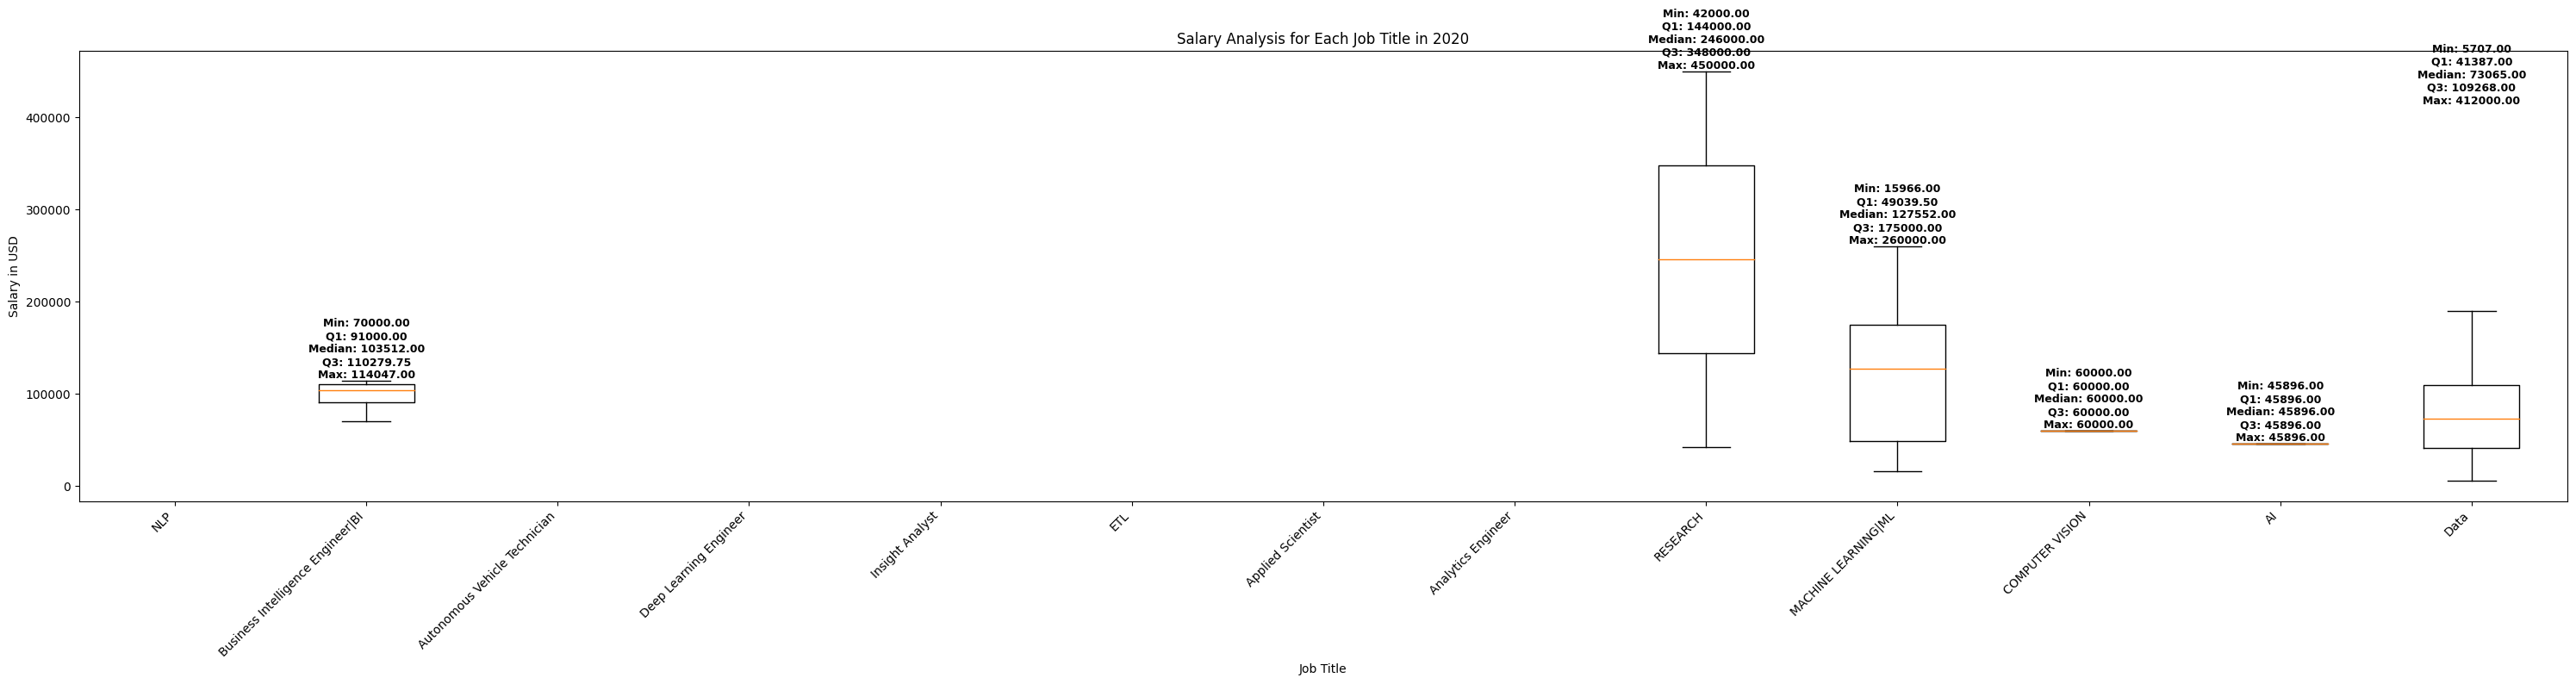

In [ ]:
import numpy as np
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
salaries_2020 = []
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2020 = filtered_data[filtered_data['work_year'] == '2020']
    if not filtered_data_2020.empty:
        salaries_2020.append(filtered_data_2020['salary_in_usd'].values)
    else:
        salaries_2020.append([])
plt.figure(figsize=(30, 8))
bp = plt.boxplot(salaries_2020, labels=job_titles, showfliers=False)
x_positions = np.arange(1, len(job_titles) + 1)
plt.xticks(x_positions, job_titles, rotation=45, ha='right')
plt.yticks(fontsize=10)
for i, job_title in enumerate(job_titles):
    if len(salaries_2020[i]) > 0:
        stats = {
            'min': np.min(salaries_2020[i]),
            'q1': np.percentile(salaries_2020[i], 25),
            'median': np.percentile(salaries_2020[i], 50),
            'q3': np.percentile(salaries_2020[i], 75),
            'max': np.max(salaries_2020[i]),
        }
        stats_text = '\n'.join([f"Min: {stats['min']:.2f}",
                               f"Q1: {stats['q1']:.2f}",
                               f"Median: {stats['median']:.2f}",
                               f"Q3: {stats['q3']:.2f}",
                               f"Max: {stats['max']:.2f}"])
        plt.text(x_positions[i], np.max(salaries_2020[i]), stats_text, ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2020')
plt.tight_layout()
plt.show()

En los Boxplot podemos observar en una "caja", el valor minimo, el Q1 (P25), la Mediana (P50), Q3 (P75), y el valor máximo, estos ya fueron definidos arriba previamente en el analisis de datos.

### **2021**

**Barras**

No hay datos disponibles para 'NLP' en el año 2021.
No hay datos disponibles para 'Deep Learning Engineer' en el año 2021.
No hay datos disponibles para 'Insight Analyst' en el año 2021.
No hay datos disponibles para 'ETL' en el año 2021.
No hay datos disponibles para 'Applied Scientist' en el año 2021.


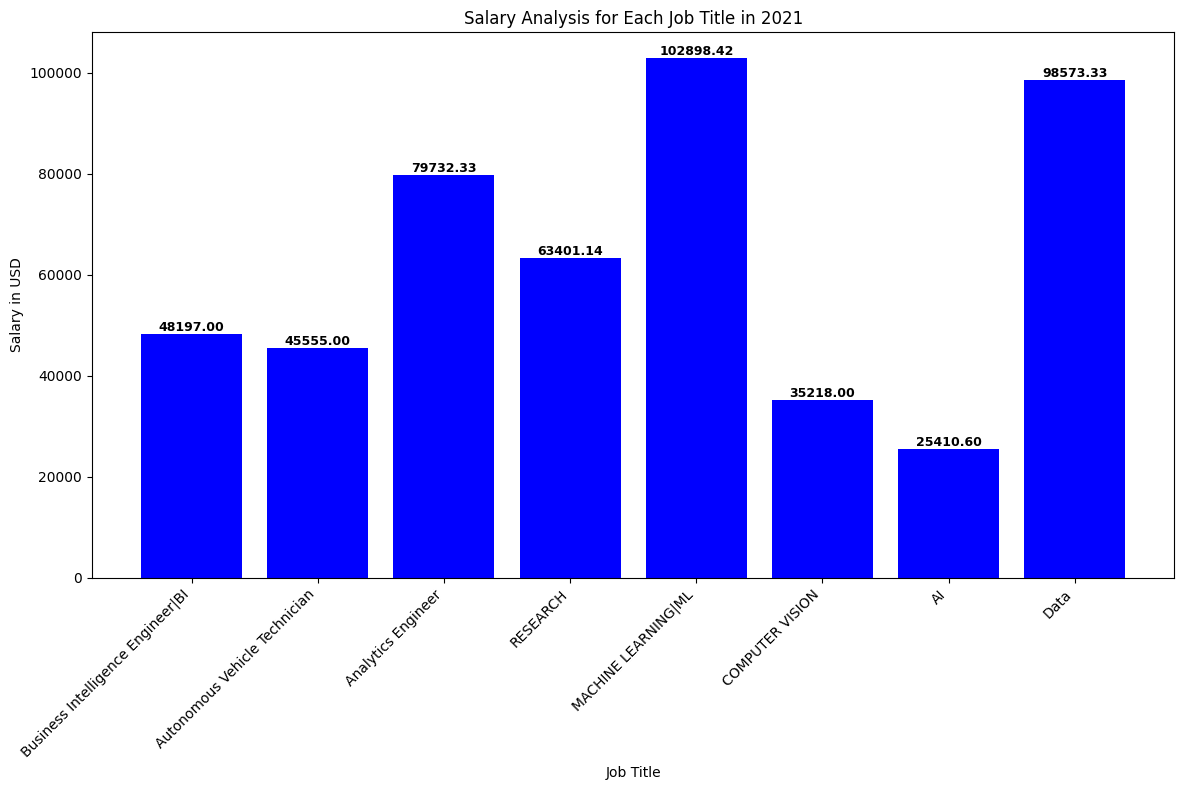

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
plt.figure(figsize=(12, 8))
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2021 = filtered_data[filtered_data['work_year'] == '2021']
    if not filtered_data_2021.empty:
        descriptive_stats_2021 = filtered_data_2021['salary_in_usd'].describe()
        plt.bar(job_title_keyword, descriptive_stats_2021['mean'], color='blue', label='Mean')
        plt.text(job_title_keyword, descriptive_stats_2021['mean'], f'{descriptive_stats_2021["mean"]:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        print(f"No hay datos disponibles para '{job_title_keyword}' en el año 2021.")
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**BoxPlot**

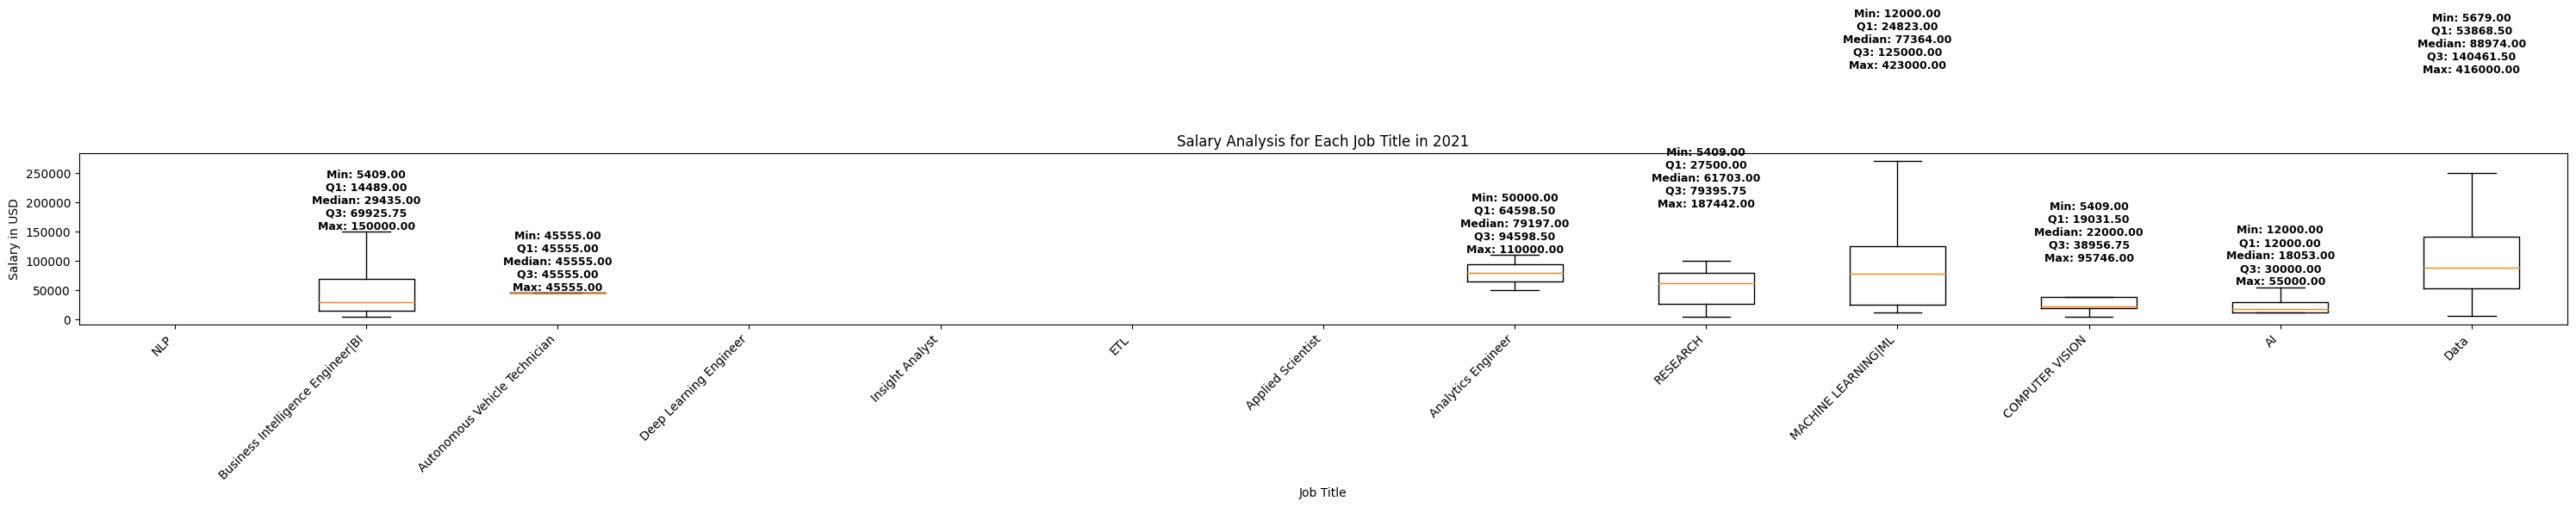

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
salaries_2021 = []
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2021 = filtered_data[filtered_data['work_year'] == '2021']
    if not filtered_data_2021.empty:
        salaries_2021.append(filtered_data_2021['salary_in_usd'].values)
    else:
        salaries_2021.append([])
plt.figure(figsize=(30, 8))
bp = plt.boxplot(salaries_2021, labels=job_titles, showfliers=False)
x_positions = np.arange(1, len(job_titles) + 1)
plt.xticks(x_positions, job_titles, rotation=45, ha='right')
plt.yticks(fontsize=10)
for i, job_title in enumerate(job_titles):
    if len(salaries_2021[i]) > 0:
        stats = {
            'min': np.min(salaries_2021[i]),
            'q1': np.percentile(salaries_2021[i], 25),
            'median': np.percentile(salaries_2021[i], 50),
            'q3': np.percentile(salaries_2021[i], 75),
            'max': np.max(salaries_2021[i]),
        }
        stats_text = '\n'.join([f"Min: {stats['min']:.2f}",
                               f"Q1: {stats['q1']:.2f}",
                               f"Median: {stats['median']:.2f}",
                               f"Q3: {stats['q3']:.2f}",
                               f"Max: {stats['max']:.2f}"])
        plt.text(x_positions[i], np.max(salaries_2021[i]), stats_text, ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2021')
plt.tight_layout()
plt.show()

En los Boxplot podemos observar en una "caja", el valor minimo, el Q1 (P25), la Mediana (P50), Q3 (P75), y el valor máximo, estos ya fueron definidos arriba previamente en el analisis de datos.

### **2022**

**Barras**

No hay datos disponibles para 'Autonomous Vehicle Technician' en el año 2022.
No hay datos disponibles para 'Insight Analyst' en el año 2022.


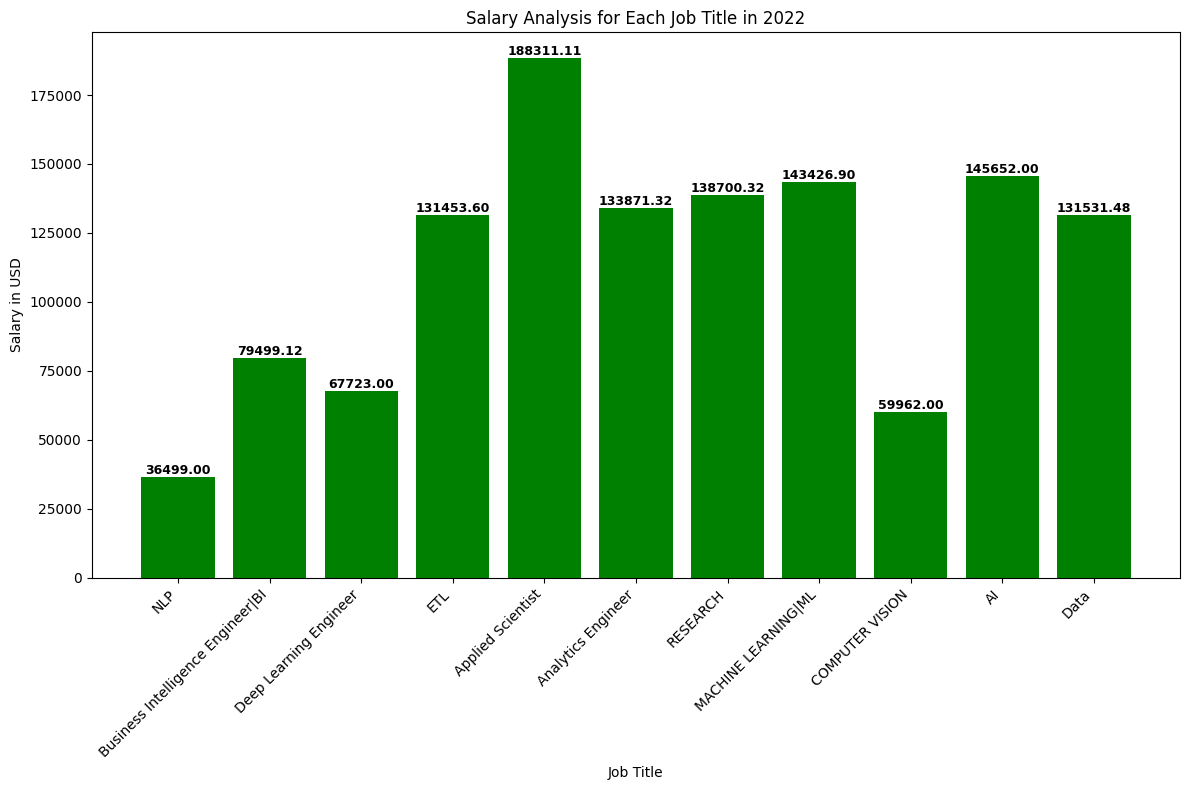

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
plt.figure(figsize=(12, 8))
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2022 = filtered_data[filtered_data['work_year'] == '2022']
    if not filtered_data_2022.empty:
        descriptive_stats_2022 = filtered_data_2022['salary_in_usd'].describe()
        plt.bar(job_title_keyword, descriptive_stats_2022['mean'], color='green', label='Mean')
        plt.text(job_title_keyword, descriptive_stats_2022['mean'], f'{descriptive_stats_2022["mean"]:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        print(f"No hay datos disponibles para '{job_title_keyword}' en el año 2022.")
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Boxplot**

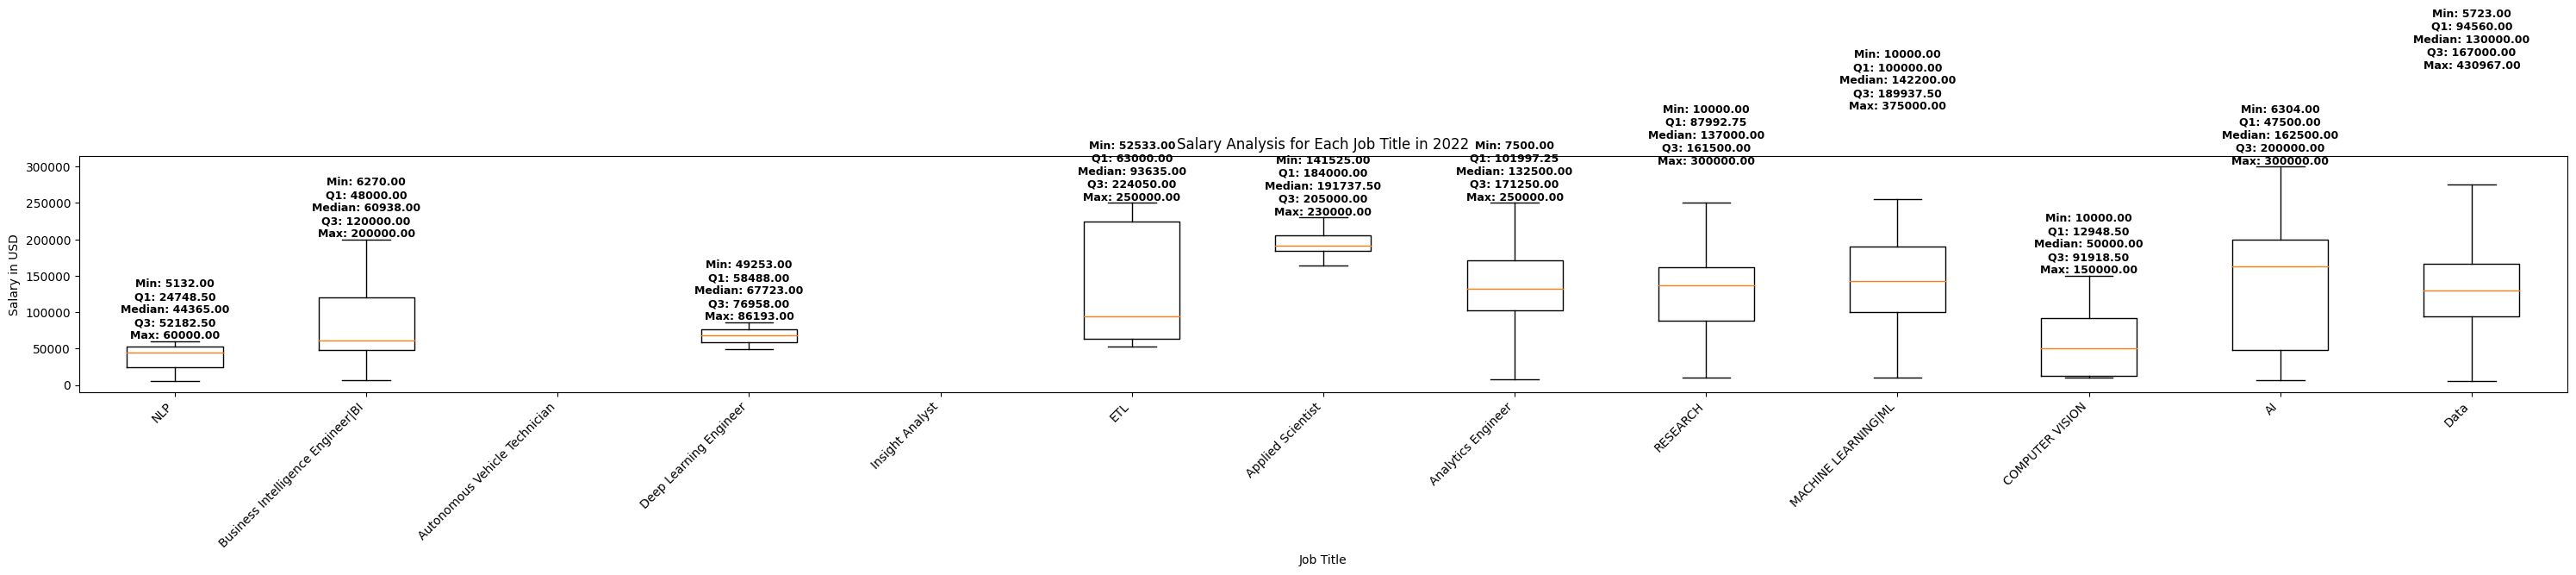

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
salaries_2022 = []
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2022 = filtered_data[filtered_data['work_year'] == '2022']
    if not filtered_data_2022.empty:
        salaries_2022.append(filtered_data_2022['salary_in_usd'].values)
    else:
        salaries_2022.append([])
plt.figure(figsize=(30, 8))
bp = plt.boxplot(salaries_2022, labels=job_titles, showfliers=False)
x_positions = np.arange(1, len(job_titles) + 1)
plt.xticks(x_positions, job_titles, rotation=45, ha='right')
plt.yticks(fontsize=10)
for i, job_title in enumerate(job_titles):
    if len(salaries_2022[i]) > 0:
        stats = {
            'min': np.min(salaries_2022[i]),
            'q1': np.percentile(salaries_2022[i], 25),
            'median': np.percentile(salaries_2022[i], 50),
            'q3': np.percentile(salaries_2022[i], 75),
            'max': np.max(salaries_2022[i]),
        }
        stats_text = '\n'.join([f"Min: {stats['min']:.2f}",
                               f"Q1: {stats['q1']:.2f}",
                               f"Median: {stats['median']:.2f}",
                               f"Q3: {stats['q3']:.2f}",
                               f"Max: {stats['max']:.2f}"])
        plt.text(x_positions[i], np.max(salaries_2022[i]), stats_text, ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2022')
plt.tight_layout()
plt.show()

En los Boxplot podemos observar en una "caja", el valor minimo, el Q1 (P25), la Mediana (P50), Q3 (P75), y el valor máximo, estos ya fueron definidos arriba previamente en el analisis de datos.

### 2023

**Barras**

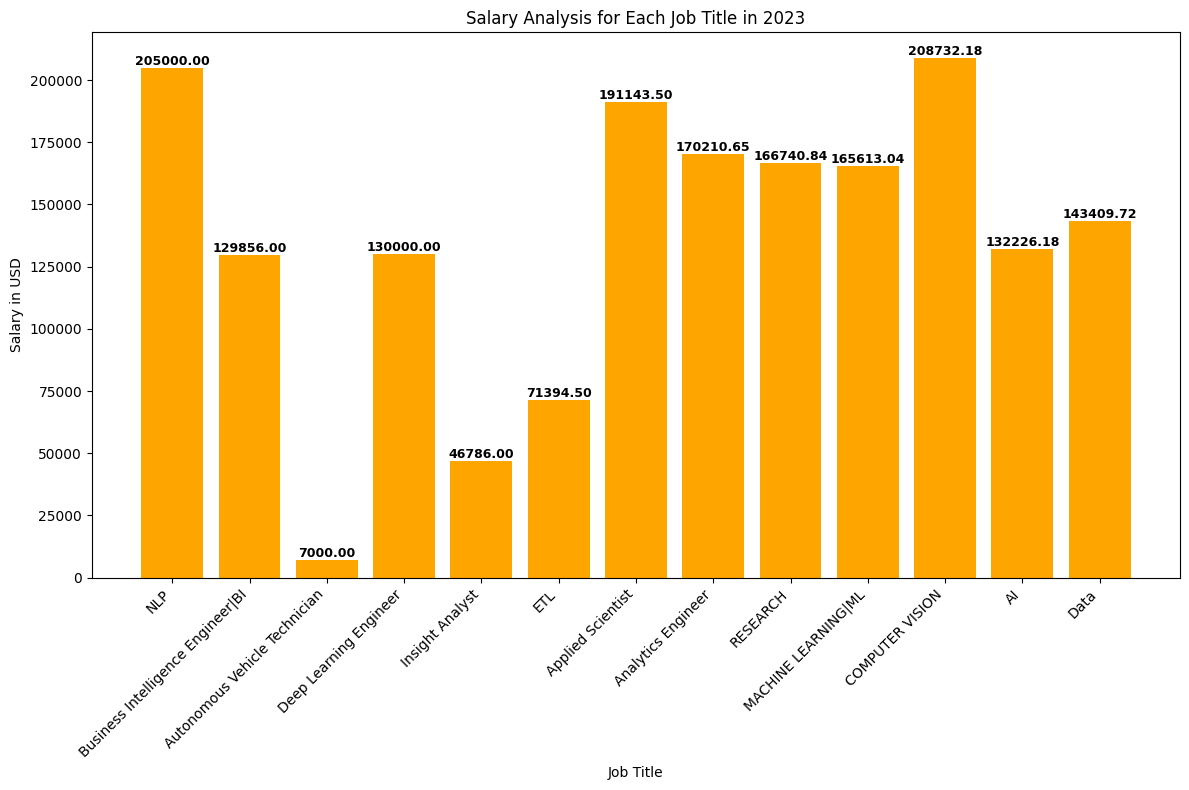

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
plt.figure(figsize=(12, 8))
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2023 = filtered_data[filtered_data['work_year'] == '2023']
    if not filtered_data_2023.empty:
        descriptive_stats_2023 = filtered_data_2023['salary_in_usd'].describe()
        plt.bar(job_title_keyword, descriptive_stats_2023['mean'], color='orange', label='Mean')
        plt.text(job_title_keyword, descriptive_stats_2023['mean'], f'{descriptive_stats_2023["mean"]:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        print(f"No hay datos disponibles para '{job_title_keyword}' en el año 2023.")
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**BoxPlot**

In [ ]:
job_titles = ["NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
salaries_2023 = []
for job_title_keyword in job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    filtered_data_2023 = filtered_data[filtered_data['work_year'] == '2023']
    if not filtered_data_2023.empty:
        salaries_2023.append(filtered_data_2023['salary_in_usd'].values)
plt.figure(figsize=(30, 8))
bp = plt.boxplot(salaries_2023, labels=job_titles, showfliers=False)
for i, job_title in enumerate(job_titles):
    stats = {
        'min': np.min(salaries_2023[i]),
        'q1': np.percentile(salaries_2023[i], 25),
        'median': np.percentile(salaries_2023[i], 50),
        'q3': np.percentile(salaries_2023[i], 75),
        'max': np.max(salaries_2023[i]),
        'mean': np.mean(salaries_2023[i]),
    }
    stats_text = '\n'.join([f"Min: {stats['min']:.2f}",
                           f"Q1: {stats['q1']:.2f}",
                           f"Median: {stats['median']:.2f}",
                           f"Q3: {stats['q3']:.2f}",
                           f"Max: {stats['max']:.2f}",
                           f"Mean: {stats['mean']:.2f}"])
    plt.text(i + 1, np.max(salaries_2023[i]), stats_text, ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Salary Analysis for Each Job Title in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En los Boxplot podemos observar en una "caja", el valor minimo, el Q1 (P25), la Mediana (P50), Q3 (P75), y el valor máximo, estos ya fueron definidos arriba previamente en el analisis de datos.

**INFORME**

Podemos observar, ademas de empleos, relativamente "nuevos", ya que comenzo la contratación de estos puestos en 2023, una mejoria en los salarios de algunos puestos en especial, en el que note una gran mejoria, es en los puestos que tienen que ver con la IA, aqui podemos denotar, que son los puestos del futuro, donde podriamos predecir sueldos aún mayores, como es de público conocimiento, las empresas estan dirigiendose a lo que es la tecnologia IA, caso Fintechs, por ejemplo. Para mi entrega final, analizare mayormente en profundidad los valores, los comparare, y realizare predicciones con estos datos, a futuro, o mejor dicho, tendencias.

## **Scikit-learn**



### **Prueba OLS**

Esta prueba, nos mostrará la significancia del modelo, y cuan confiables los datos son y predicciones son.
Para ello otorgaremos la variable independiente y (salary_in_usd), y las demas variables dependientes (work_year, job_title, experience_level, employment_type)
cuantas mas variables dependientes mayor es la significancia, si bien nosotros en nuestro modelo utilizamos work_year, junto con job_title, el nivel de experiencia y el tipo de empleo generan una variabilidad en el dato salary_in_usd, por esto, lo tenemos en cuenta en la prueba.

In [ ]:
import seaborn as sns
import statsmodels.api as sm
y = df['salary_in_usd']
X = df[['work_year', 'job_title', 'experience_level', 'employment_type']]
X['work_year'] = X['work_year'].astype(int)
X = X.dropna()
y = y[X.index]
X = pd.get_dummies(X, columns=['job_title', 'experience_level', 'employment_type'], drop_first=True)
X = sm.add_constant(X)
reg_linear = sm.OLS(y, X)
results_linear = reg_linear.fit()
print(results_linear.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     17.17
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.83e-231
Time:                        21:53:57   Log-Likelihood:                -46110.
No. Observations:                3755   AIC:                         9.242e+04
Df Residuals:                    3655   BIC:                         9.304e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Se ha utilizado el método de Mínimos Cuadrados Ordinarios (OLS) para ajustar el modelo y se evaluará su rendimiento y significancia estadística.

**Descripción del Modelo:**
El modelo de regresión lineal utilizado es de tipo OLS y se ha aplicado sobre un conjunto de datos que consta de 3755 observaciones. La variable dependiente o variable a predecir es "salary_in_usd", que representa el salario en dólares estadounidenses. Se han considerado 99 títulos de empleo diferentes y el número de años de experiencia laboral como variables predictoras para el modelo.

**Resultados del Modelo:**
El modelo ha arrojado los siguientes resultados:

- R-squared: 0.317
  El coeficiente de determinación R-squared, también conocido como el coeficiente de determinación múltiple, indica la proporción de la variabilidad de la variable dependiente que es explicada por las variables independientes. En este caso, el R-squared es 0.317, lo que significa que aproximadamente el 31.7% de la variabilidad en los salarios puede ser explicada por las variables del modelo.

- R-squared ajustado: 0.299
  El R-squared ajustado es una versión corregida del coeficiente de determinación que tiene en cuenta el número de variables independientes en el modelo. En este caso, el R-squared ajustado es 0.299, lo que indica que alrededor del 29.9% de la variabilidad en los salarios puede ser explicada por las variables del modelo, teniendo en cuenta el número de títulos de empleo y años de experiencia considerados.

- F-statistic: 17.17
  El valor de F-statistic es una medida de la significancia global del modelo de regresión. En este caso, el F-statistic es 17.17, y la probabilidad asociada a este valor es extremadamente baja (1.83e-231), lo que indica que el modelo es estadísticamente significativo.

- Prob (F-statistic): 1.83e-231
  La probabilidad asociada al F-statistic representa la probabilidad de obtener el valor del estadístico F bajo la hipótesis nula de que el modelo no tiene poder predictivo. Dado que esta probabilidad es extremadamente baja, podemos rechazar la hipótesis nula y concluir que el modelo tiene poder predictivo y es estadísticamente significativo.

**Análisis de residuos:**
El análisis de residuos revela que el modelo de regresión lineal no se ajusta adecuadamente a los datos, ya que los residuos no siguen una distribución normal. Además, la presencia de sesgo y curtosis indica que los residuos tienen colas pesadas y valores extremos, lo que afecta la precisión de las predicciones del modelo.

### **Todos los trabajos**

Aqui hacemos una predicción del salario promedio en 2024, con los datos de los años 2020, 2021, 2022 y 2023, ademas de otorgar una tendencia. Esta predicción esta basada en todos los trabajos incorporados en el dataset, sin filtrar.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
pd.options.mode.chained_assignment = None
job_titles_all = df['job_title'].unique()
predictions_2024 = pd.DataFrame()
for job_title in job_titles_all:
    filtered_data = df[df['job_title'] == job_title]
    if len(filtered_data['work_year'].unique()) >= 2:
        filtered_data = filtered_data.copy()
        X = filtered_data[['work_year']]
        y = filtered_data['salary_in_usd']
        X['work_year'] = X['work_year'].astype(int)
        X_2024 = pd.DataFrame({'work_year': [2024]})
        model = LinearRegression()
        model.fit(X, y)
        y_pred_2024 = model.predict(X_2024)
        historical_mean_salary = y.mean()
        prediction = "Aumento" if y_pred_2024[0] > historical_mean_salary else "Decrecimiento"
        prediction_row = pd.DataFrame({'Job_Title': [job_title], 'Predicted_Salary_2024': [y_pred_2024[0]], 'Trend': [prediction]})
        predictions_2024 = pd.concat([predictions_2024, prediction_row], ignore_index=True)
    else:
        prediction_row = pd.DataFrame({'Job_Title': [job_title], 'Predicted_Salary_2024': [float('0')], 'Trend': ["No suficientes datos"]})
        predictions_2024 = pd.concat([predictions_2024, prediction_row], ignore_index=True)
predictions_2024_styled = (
    predictions_2024.style.set_caption("Predicciones para 2024: Aumento o Decrecimiento")
    .set_table_styles([{'selector': 'th', 'props': [('font-weight', 'bold')]}])
)
display(predictions_2024_styled)

,Job_Title,Predicted_Salary_2024,Trend
0,Principal Data Scientist,89466.000000,Decrecimiento
1,ML Engineer,193501.780702,Aumento
2,Data Scientist,187071.446023,Aumento
3,Applied Scientist,193975.888889,Aumento
4,Data Analyst,130820.525397,Aumento
5,Data Modeler,0.000000,No suficientes datos
6,Research Engineer,104358.750000,Decrecimiento
7,Analytics Engineer,202451.497330,Aumento
8,Business Intelligence Engineer,0.000000,No suficientes datos
9,Machine Learning Engineer,196598.546290,Aumento


**Resultado:** Podemos observar que hay trabajos que no poseen suficientes datos, esto quiere decir que poseemos muchos Nan en el promedio de datos de mas de 2 años, por lo tanto, al intentar evaluar y hacer una predicción, los datos no son suficientes, debido a que esta prediccion no seria significativa. Luego podemos observar, quienes tienen el salario promedio negativo, presentan una variabilidad de datos importante, usualmente tienen 2 Nan, y sus promedios tienen una separacion importante, cuando un salario anterior es mas alto que el año mas cercano a 2024, quiere decir que estos trabajos, ya estan siendo reemplazados, o su salario va en disminución, por lo tanto, en la tendencia de decrecimiento, no solo aplica al salario promedio, sino tambien a la busqueda en esta posición. Luego los que son positivos, y aumenta o decrece, ya estan basados en tendencias de los 3 años, y como viene variando el salario de ese puesto.

### **Trabajos Filtrados**

Aqui generamos una predicción utilizando Regresión Lineal, para los salarios del año 2024 y sus tendencias, dependientes de los job_titles que se filtraron anteriormente.

,Job_Title,Salary_2024,Prediction
0,NLP,373501.000000,Aumento
1,Business Intelligence Engineer|BI,120721.683824,Aumento
2,Autonomous Vehicle Technician,-12277.500000,Decrecimiento
3,Deep Learning Engineer,192277.000000,Aumento
4,Insight Analyst,nan,No posee suficientes datos
5,ETL,11335.400000,Decrecimiento
6,Applied Scientist,193975.888889,Aumento
7,Analytics Engineer,218416.419565,Aumento
8,RESEARCH,113091.005159,Decrecimiento
9,MACHINE LEARNING|ML,173147.233629,Aumento


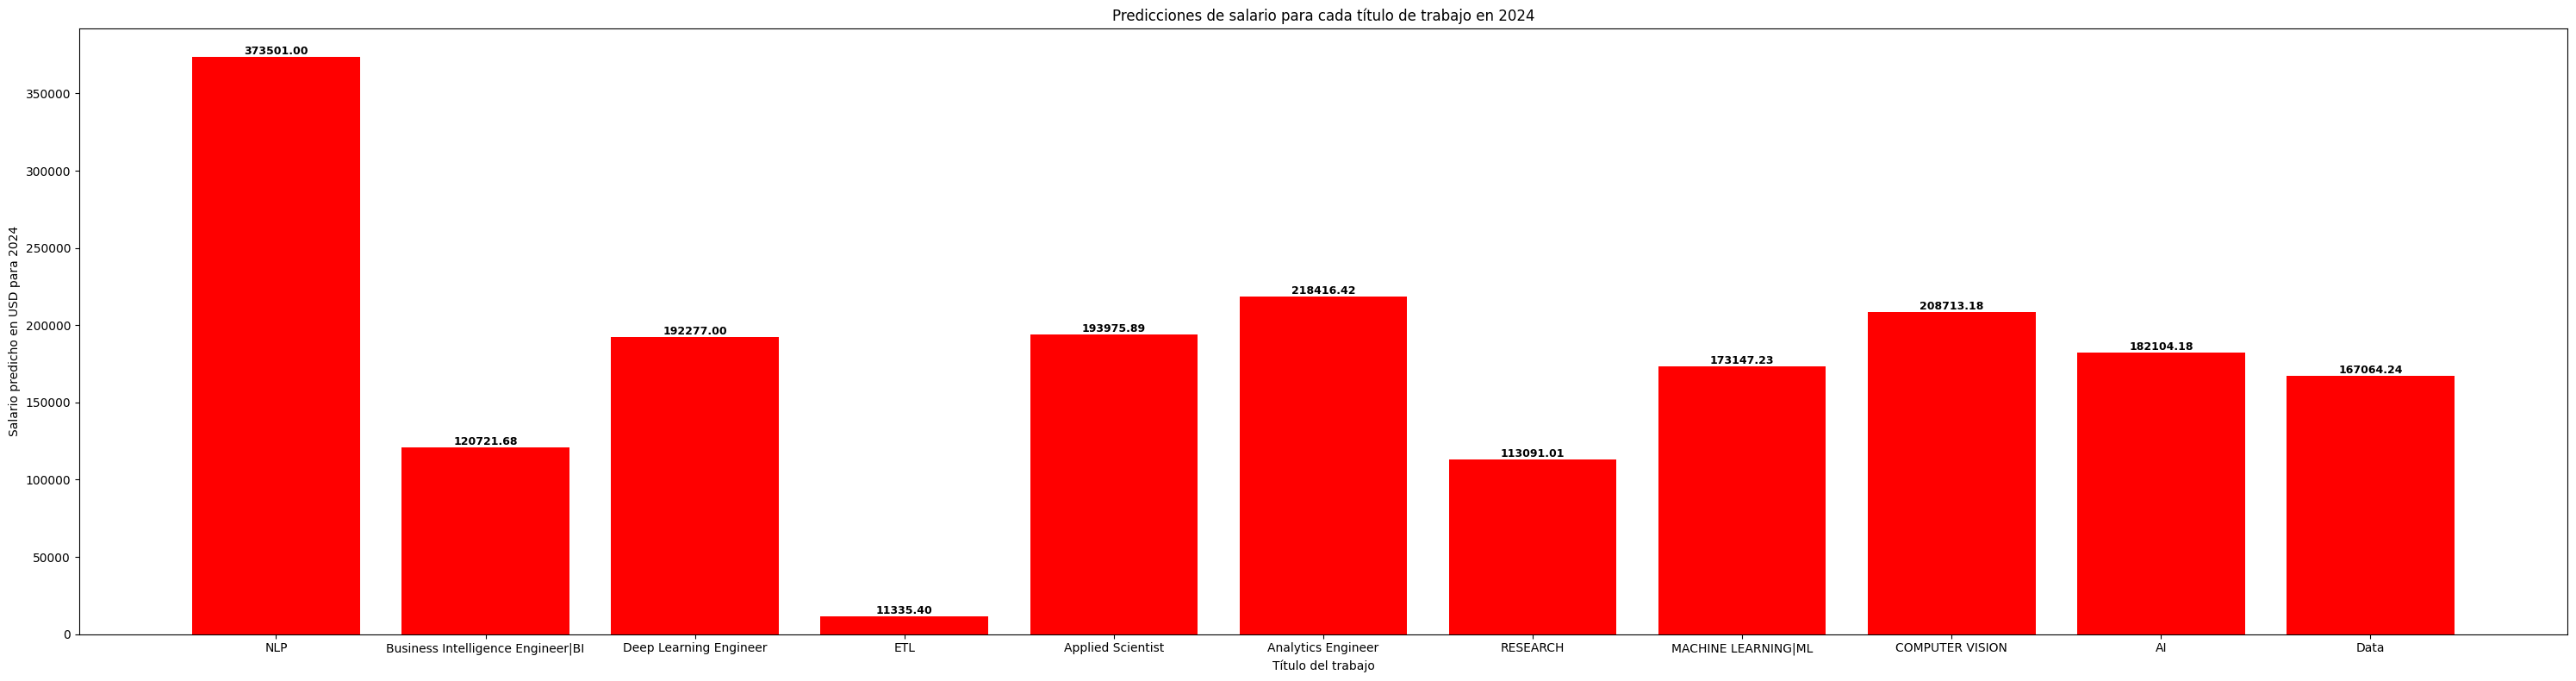

In [ ]:
desired_job_titles = [
    "NLP", "Business Intelligence Engineer|BI", "Autonomous Vehicle Technician", "Deep Learning Engineer", "Insight Analyst", "ETL", "Applied Scientist", "Analytics Engineer", "RESEARCH", "MACHINE LEARNING|ML", "COMPUTER VISION", "AI", "Data"]
predictions_2024 = pd.DataFrame()
for job_title_keyword in desired_job_titles:
    filtered_data = df[df['job_title'].str.contains(job_title_keyword, case=False)]
    salaries_by_year = filtered_data.groupby('work_year')['salary_in_usd'].mean()
    salary_2020 = salaries_by_year.get(2020, np.nan)
    salary_2021 = salaries_by_year.get(2021, np.nan)
    salary_2022 = salaries_by_year.get(2022, np.nan)
    salary_2023 = salaries_by_year.get(2023, np.nan)
    historical_salaries = [salary for salary in [salary_2020, salary_2021, salary_2022, salary_2023] if not pd.isnull(salary)]
    if len(historical_salaries) >= 2:
        X_train = np.array([year for year in years if not pd.isnull(salaries_by_year.get(year))]).reshape(-1, 1)
        y_train = np.array(historical_salaries)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        salary_prediction_2024 = regressor.predict([[2024]])[0]
        historical_mean_salary = np.mean(historical_salaries)
        prediction = "Aumento" if salary_prediction_2024 > historical_mean_salary else "Decrecimiento"
    else:
        salary_prediction_2024 = np.nan
        prediction = "No posee suficientes datos"
    prediction_row = pd.DataFrame({
        'Job_Title': [job_title_keyword],
        'Salary_2024': [salary_prediction_2024],
        'Prediction': [prediction]
    })
    predictions_2024 = pd.concat([predictions_2024, prediction_row], ignore_index=True)
predictions_2024_styled = (
    predictions_2024.style.set_caption("Predicciones para 2024: Aumento o Decrecimiento")
    .set_table_styles([{'selector': 'th', 'props': [('font-weight', 'bold')]}])
)
display(predictions_2024_styled)
predictions_2024_filtered = predictions_2024.dropna(subset=['Salary_2024'])
predictions_2024_filtered = predictions_2024_filtered[predictions_2024_filtered['Salary_2024'] > 0]
plt.figure(figsize=(30, 8))
plt.bar(predictions_2024_filtered['Job_Title'], predictions_2024_filtered['Salary_2024'], color='red')
plt.xlabel('Título del trabajo')
plt.ylabel('Salario predicho en USD para 2024')
plt.title('Predicciones de salario para cada título de trabajo en 2024')
for index, value in enumerate(predictions_2024_filtered['Salary_2024']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

**Resultado:** Aqui estamos filtrando los job_titles, en los 15 que habiamos aplicado en la estadistica por año de trabajo y puesto. Como anteriormente, los que no poseen datos, porque tienen mas de 2 Nan, estan marcados en tendencias con la frase "No posee suficientes datos", y ademas no figuran en el gráfico. Los resultados de salarios negativos, tampoco aparecen, estos demuestran una variabilidad significativa, ya que le faltan datos, ademas de generarse una amplia diferencia entre salarios, el unico que posee esta caracteristica es el de Autonomous Vehicle Technician, donde su rango es de (Nan, 45555, Nan, 7000), es por esto que al no poseer muchos datos, y generarse una diferencia del 2021 al 2023, de +30mil, nos da un negativo y un decrecimiento importante, es por esto, que no es un resultado significativo, y en nuestra conclusion, no la tendremos en cuenta.

**Informe Predicciones y Tendencias:**

Comparación de los salarios promedio en diferentes años para cada categoría de trabajo:

1. NLP:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: No hay datos disponibles.
   - Salario promedio en 2022: 36,499 USD
   - Salario promedio en 2023: 205,000 USD
   - Salario promedio en 2024: 373,501 USD
   - Tendencia: Aumento significativo a lo largo de los años.

2. Business Intelligence Engineer|BI:
   - Salario promedio en 2020: 97,768 USD
   - Salario promedio en 2021: 48,197 USD
   - Salario promedio en 2022: 79,499 USD
   - Salario promedio en 2023: 129,856 USD
   - Salario promedio en 2024: 120,721.68 USD
   - Tendencia: Aumento inicial en 2022 y 2023, seguido de un leve decrecimiento en 2024.

3. Autonomous Vehicle Technician:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: 45,555 USD
   - Salario promedio en 2022: No hay datos disponibles.
   - Salario promedio en 2023: 7,000 USD
   - Salario promedio en 2024: -12,277.50 USD
   - Tendencia: No es significativo el promedio de 2024, se prevé una disminución, pero especialmente debido a la disminucion de demanda de este empleo.

4. Deep Learning Engineer:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: No hay datos disponibles.
   - Salario promedio en 2022: 67,723 USD
   - Salario promedio en 2023: 130,000 USD
   - Salario promedio en 2024: 192,277 USD
   - Tendencia: Aumento significativo a lo largo de los años.

5. Insight Analyst:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: No hay datos disponibles.
   - Salario promedio en 2022: No hay datos disponibles.
   - Salario promedio en 2023: 46,786 USD
   - Salario promedio en 2024: No hay datos disponibles.
   - Tendencia: Faltan datos.

6. ETL:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: No hay datos disponibles.
   - Salario promedio en 2022: 131453.60 USD
   - Salario promedio en 2023: 71394.50
   - Salario promedio en 2024: 11,335.40 USD
   - Tendencia: Decrecimiento de 2022 en adelante.

7. Applied Scientist:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: No hay datos disponibles.
   - Salario promedio en 2022: 188,311.11 USD
   - Salario promedio en 2023: 191,143.50 USD
   - Salario promedio en 2024: 193,975.89 USD
   - Tendencia: Aumento a lo largo de los años.

8. Analytics Engineer:
   - Salario promedio en 2020: No hay datos disponibles.
   - Salario promedio en 2021: 79,732.33 USD
   - Salario promedio en 2022: 133,871.32 USD
   - Salario promedio en 2023: 170,210.65 USD
   - Salario promedio en 2024: 218,416.42 USD
   - Tendencia: Aumento a lo largo de los años.

9. RESEARCH:
   - Salario promedio en 2020: 246,000 USD
   - Salario promedio en 2021: 63,401.14 USD
   - Salario promedio en 2022: 138,700.32 USD
   - Salario promedio en 2023: 166,740.84 USD
   - Salario promedio en 2024: 113,091.01 USD
   - Tendencia: Aumento en 2022 y 2023, seguido de un decrecimiento en 2024.

10. MACHINE LEARNING|ML:
    - Salario promedio en 2020: 128,358.50 USD
    - Salario promedio en 2021: 102,898.20 USD
    - Salario promedio en 2022: 143,426.90 USD
    - Salario promedio en 2023: 165,613.04 USD
    - Salario promedio en 2024: 173,147.23 USD
    - Tendencia: Aumento en 2022 y 2023, seguido de un leve aumento en 2024.

11. COMPUTER VISION:
    - Salario promedio en 2020: 60,000 USD
    - Salario promedio en 2021: 35,218 USD
    - Salario promedio en 2022: 59,962 USD
    - Salario promedio en 2023: 208,732.18 USD
    - Salario promedio en 2024: 208,713.18 USD
    - Tendencia: Aumento a lo largo de los años.

12. AI:
    - Salario promedio en 2020: 45,896 USD
    - Salario promedio en 2021: 25,410.60 USD
    - Salario promedio en 2022: 145,652 USD
    - Salario promedio en 2023: 132,226.18 USD
    - Salario promedio en 2024: 182,104.18 USD
    - Tendencia: Aumento a lo largo de los años.

13. Data:
    - Salario promedio en 2020: 84,222.44 USD
    - Salario promedio en 2021: 98,573.33 USD
    - Salario promedio en 2022: 131,531.48 USD
    - Salario promedio en 2023: 143,409.72 USD
    - Salario promedio en 2024: 167,064.24 USD
    - Tendencia: Aumento a lo largo de los años.

### **Prueba Predicciones**

Utilizado para chequear algunas estadisticas por mi parte, de forma "manual", en el cotejo, la mayoria dio similar o aproximado, salvo las que no son significativas.

In [ ]:
years = [2020, 2021, 2022, 2023]
salaries = ["Dato2020", "Dato2021", "Dato2022", "Dato2023"] #Reemplazo "Dato202x" por el valor que corresponda, ejemplo BI 2020 es 97767.75.
X_train = np.array(years).reshape(-1, 1)
salaries_cleaned = np.nan_to_num(salaries)
y_train = np.array(salaries_cleaned)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted_salary_2024 = regressor.predict([[2024]])[0]
trend = "Aumento" if predicted_salary_2024 > salaries_cleaned[-1] else "Decrecimiento"

print("Predicción de salario para 2024:", predicted_salary_2024)
print("Tendencia de aumento o decrecimiento para 2024:", trend)


## **Informe Final**

1. NLP:
   - Tendencia: Esta tendencia puede deberse a la creciente demanda de profesionales especializados en procesamiento del lenguaje natural, especialmente en el ámbito de la inteligencia artificial y el análisis de datos.

2. Business Intelligence Engineer|BI:
   - Tendencia: La fluctuación puede estar relacionada con factores económicos y cambios en la industria de la inteligencia empresarial. Es posible que en 2024 haya una mayor oferta de profesionales en este campo, lo que podría impactar los salarios.

3. Autonomous Vehicle Technician:
   - Tendencia: Esta tendencia puede atribuirse a la evolución de la industria de vehículos autónomos, que puede haber experimentado cambios en la demanda de profesionales con habilidades específicas en este campo. Además, el impacto de eventos como la pandemia de COVID-19 podría haber afectado el desarrollo y la adopción de tecnologías de conducción autónoma.

4. Deep Learning Engineer:
   - Tendencia: Al igual que en NLP, se observa un aumento significativo en el salario promedio a lo largo de los años. Esto puede explicarse por la creciente importancia y demanda de profesionales especializados en aprendizaje profundo en diversos sectores, incluyendo la tecnología, la investigación y la ciencia de datos.

5. Insight Analyst:
   - Tendencia: La falta de datos en 2020 y 2021 dificulta el análisis de la tendencia salarial para este puesto. El salario promedio muestra un incremento en 2023. Es posible que este puesto esté ganando relevancia en el análisis de datos en diversas industrias, lo que podría estar impactando los salarios.

6. ETL:
   - Tendencia: La variabilidad en el salario puede estar relacionada con la demanda fluctuante de profesionales especializados en extracción, transformación y carga de datos en diferentes proyectos y empresas.

7. Applied Scientist:
   - Tendencia: Se muestra un aumento progresivo en el salario promedio a lo largo de los años. Esto puede deberse a la creciente necesidad de expertos en ciencia de datos y análisis para abordar problemas y proyectos complejos en diversas áreas, como la investigación, la industria y el desarrollo de tecnologías.

8. Analytics Engineer:
   - Tendencia: Similar a Applied Scientist, se observa un aumento en el salario promedio a lo largo de los años. Los ingenieros de análisis son fundamentales para el diseño y la implementación de sistemas de análisis de datos, lo que puede estar impulsando la demanda y, por lo tanto, los salarios en esta categoría.

9. RESEARCH:
   - Tendencia: La investigación es una disciplina amplia y puede variar según los sectores y las áreas de enfoque, lo que puede estar influyendo en los cambios salariales.

10. MACHINE LEARNING|ML:
    - Tendencia: Similar a otros campos relacionados con la inteligencia artificial y el aprendizaje automático, se observa un aumento en el salario promedio a lo largo de los años, lo que refleja la creciente demanda de profesionales en esta área.

11. COMPUTER VISION:
    - Tendencia: El salario promedio muestra un aumento a lo largo de los años, lo que puede deberse a la creciente importancia de la visión por computadora en diversos campos, como la robótica, la industria automotriz, la salud y la tecnología de la información.

12. AI:
    - Tendencia: La inteligencia artificial es un campo en rápido crecimiento y su aplicación se extiende a múltiples sectores, lo que puede estar impulsando la demanda y los salarios de los profesionales en esta área.

13. Data:
    - Tendencia: La ciencia de datos y el análisis de datos son esenciales en la toma de decisiones empresariales, lo que ha llevado a una mayor demanda de profesionales en este campo y, por lo tanto, a un aumento en los salarios.

**Conclusion**:

Los puestos relacionados con la inteligencia artificial, el aprendizaje automático y el análisis de datos, como NLP, Deep Learning Engineer, Applied Scientist, Analytics Engineer, MACHINE LEARNING|ML, COMPUTER VISION, AI y Data, muestran una tendencia general de aumento en los salarios promedio a lo largo de los años. Esto puede atribuirse a la creciente importancia de estas áreas en la industria y la investigación, lo que ha llevado a una mayor demanda de profesionales con habilidades especializadas en estos campos.

Por otro lado, puestos como Business Intelligence Engineer|BI y Research presentan fluctuaciones en los salarios promedio, con aumentos en algunos años y disminuciones en otros. Esto puede estar influenciado por factores económicos y cambios en la demanda y las necesidades de las empresas y la industria.

Además, algunos puestos, como Autonomous Vehicle Technician e Insight Analyst, tienen datos limitados disponibles, lo que dificulta una evaluación completa de las tendencias salariales en estos casos.

Es importante tener en cuenta que los cambios salariales también pueden verse afectados por eventos externos, como la pandemia de COVID-19 y las tendencias económicas globales. Los avances tecnológicos, la evolución de la industria y la demanda de habilidades específicas también pueden jugar un papel importante en las tendencias salariales para cada categoría de trabajo.